In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/rainfall in india 1901-2015.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
df.shape


(4116, 19)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
YEAR,4116.0,1958.218659,33.140898,1901.0,1930.000,1958.0,1987.000,2015.0
JAN,4112.0,18.957320,33.585371,0.0,0.600,6.0,22.200,583.7
FEB,4113.0,21.805325,35.909488,0.0,0.600,6.7,26.800,403.5
MAR,4110.0,27.359197,46.959424,0.0,1.000,7.8,31.300,605.6
APR,4112.0,43.127432,67.831168,0.0,3.000,15.7,49.950,595.1
MAY,4113.0,85.745417,123.234904,0.0,8.600,36.6,97.200,1168.6
JUN,4111.0,230.234444,234.710758,0.4,70.350,138.7,305.150,1609.9
JUL,4109.0,347.214334,269.539667,0.0,175.600,284.8,418.400,2362.8
AUG,4112.0,290.263497,188.770477,0.0,155.975,259.4,377.800,1664.6
SEP,4110.0,197.361922,135.408345,0.1,100.525,173.9,265.800,1222.0


In [ ]:
df.isnull().sum()


SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [ ]:
df.columns


Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [ ]:
df.rename(str.strip,
		axis='columns',
		inplace=True)

df.columns


Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with missing values
# Loop through each column in the DataFrame
for col in df.columns:
    # Checking if the column contains any null values
    if df[col].isnull().sum() > 0:
        # Calculate the mean of the column
        val = df[col].mean()
        # Fill missing values in the column with the calculated mean
        df[col] = df[col].fillna(val)

# Check if there are any remaining missing values in the DataFrame
total_missing = df.isnull().sum().sum()
print(f"Total missing values after mean imputation: {total_missing}")


Total missing values after mean imputation: 0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
dataset_path = "/content/rainfall in india 1901-2015.csv"
df = pd.read_csv(dataset_path)

# Define a function to analyze annual rainfall for a given district
def analyze_annual_rainfall(df, district):
    df_district = df[df['SUBDIVISION'] == district]
    df_district = df_district[df_district['ANNUAL'].notna() & (df_district['ANNUAL'] != 'NAN')]
    return df_district['YEAR'], df_district['ANNUAL'].astype(float)

# List of unique districts (subdivisions) in the dataset
districts = df['SUBDIVISION'].unique()

# Define colors for plotting
colors = ["#808000", "#FF0000", "#0000FF", "#808000", "#800080", "#008000", "#800000", "#A52A2A", "#FFA500", "#000000", "#151B54", "#FBB917",
          "#806517", "#C11B17", "#810541", "#F6358A", "#808000", "#FF0000", "#0000FF", "#808000", "#800080", "#008000", "#800000", "#A52A2A",
          "#FFA500", "#000000", "#151B54", "#FBB917", "#806517", "#C11B17", "#810541", "#F6358A", "#808000", "#FF0000", "#0000FF", "#808000"]

# Create subplots for each district
fig, axs = plt.subplots(len(districts), figsize=(25, 5 * len(districts)))

for i, district in enumerate(districts):
    year, annual = analyze_annual_rainfall(df, district)
    axs[i].plot(year, annual, color=colors[i], alpha=0.7, marker='o', linestyle='dashed', linewidth=2, markersize=12)
    axs[i].set_title(f"{district} Annual Rainfall", size=25)
    axs[i].set_xlabel("Year", size=20)
    axs[i].set_ylabel("Rainfall in Centimeters", size=20)

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

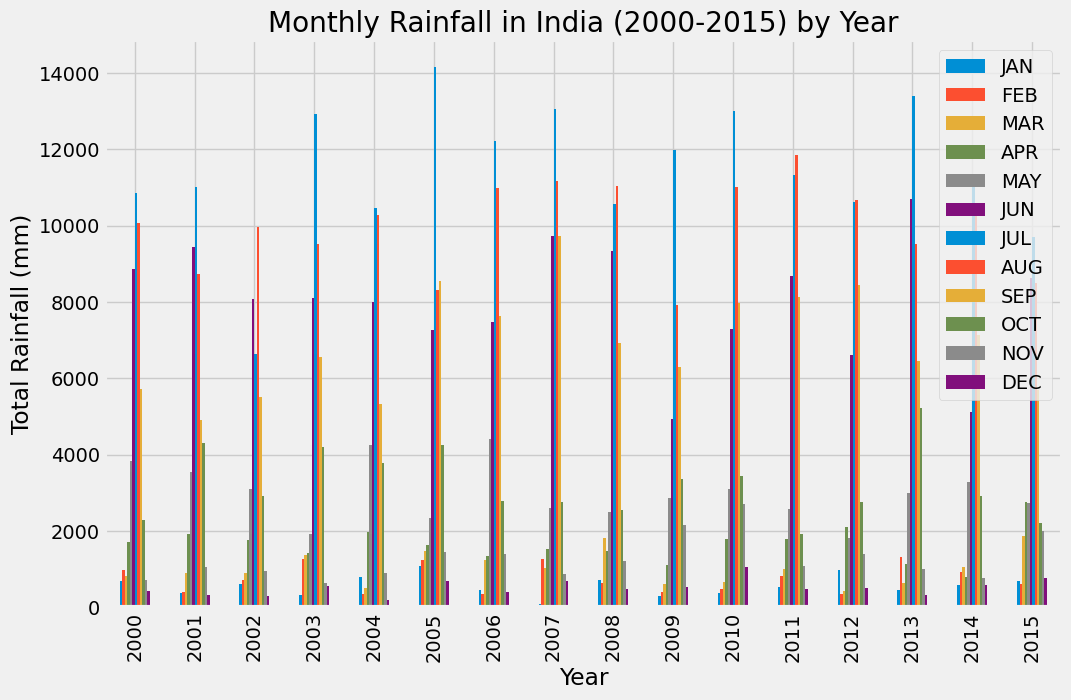

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# Make sure your dataset has columns for 'YEAR', 'JAN', 'FEB', 'MAR', ..., 'DEC'
data = pd.read_csv('/content/rainfall in india 1901-2015.csv')

# Define the range of years you want to include
start_year = 2000
end_year = 2015

# Filter the data to include only the specified range of years
filtered_data = data[(data['YEAR'] >= start_year) & (data['YEAR'] <= end_year)]

# Group by "YEAR" and sum the monthly columns
data_grouped = filtered_data.groupby("YEAR")[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum()

# Plot the grouped data
data_grouped.plot(kind='bar', figsize=(11, 7))
plt.title(f'Monthly Rainfall in India ({2000}-{2015}) by Year')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.show()


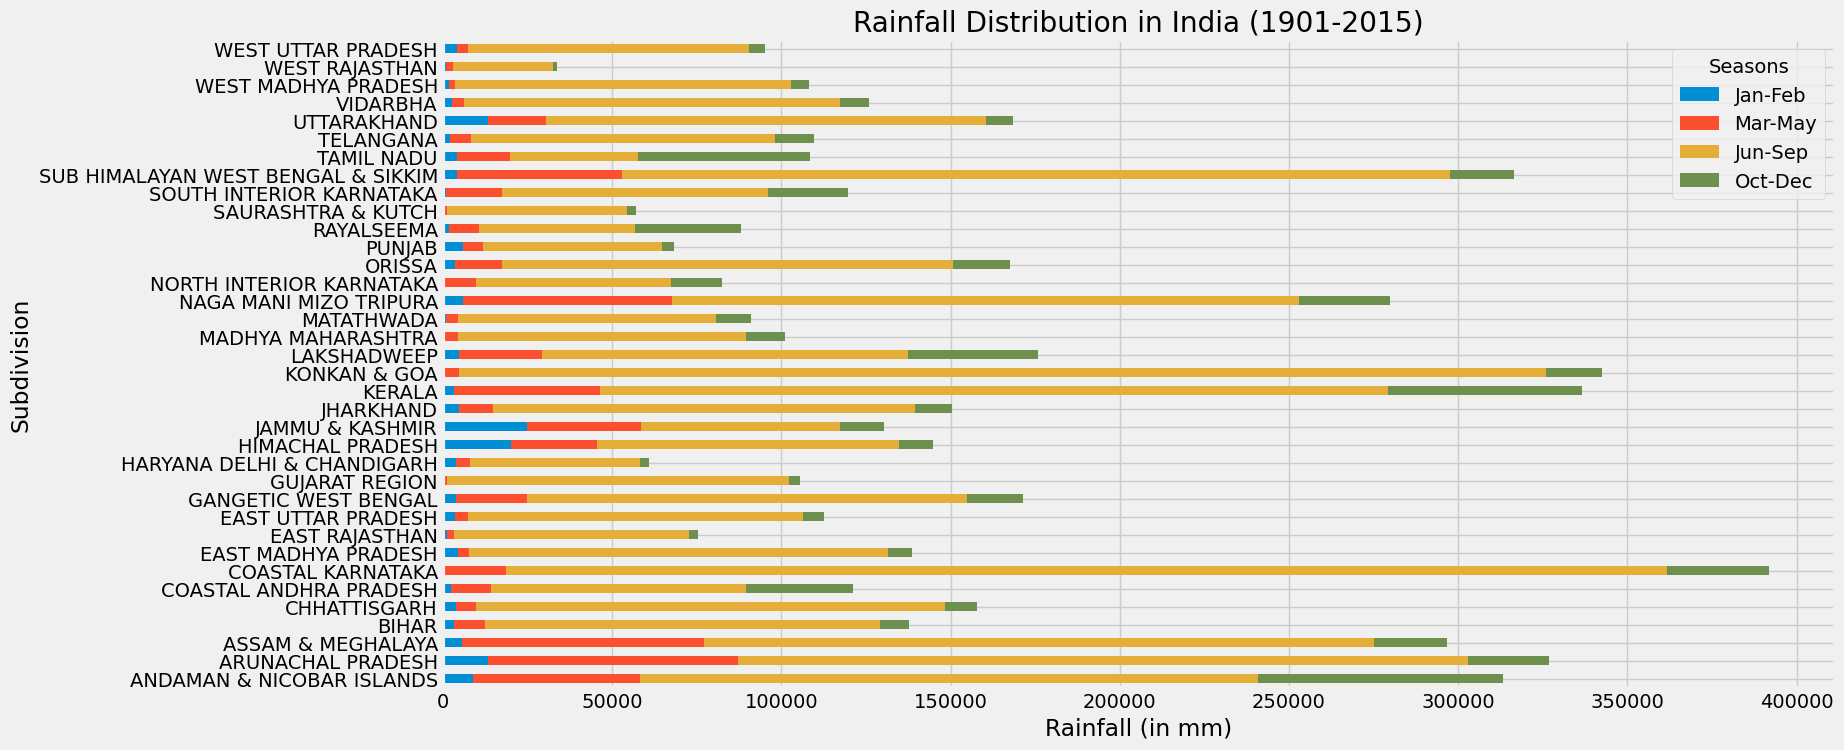

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset, replace 'your_dataset.csv' with your actual dataset file
# Make sure your dataset contains columns: 'SUBDIVISION', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'
df = pd.read_csv('/content/rainfall in india 1901-2015.csv')

# Group by 'SUBDIVISION' and sum the columns
grouped_data = df[['SUBDIVISION', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum()

# Create a stacked horizontal bar chart
grouped_data.plot.barh(stacked=True, figsize=(16, 8))

plt.title('Rainfall Distribution in India (1901-2015)')
plt.xlabel('Rainfall (in mm)')
plt.ylabel('Subdivision')
plt.legend(title='Seasons', loc='upper right', labels=['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'])
plt.show()


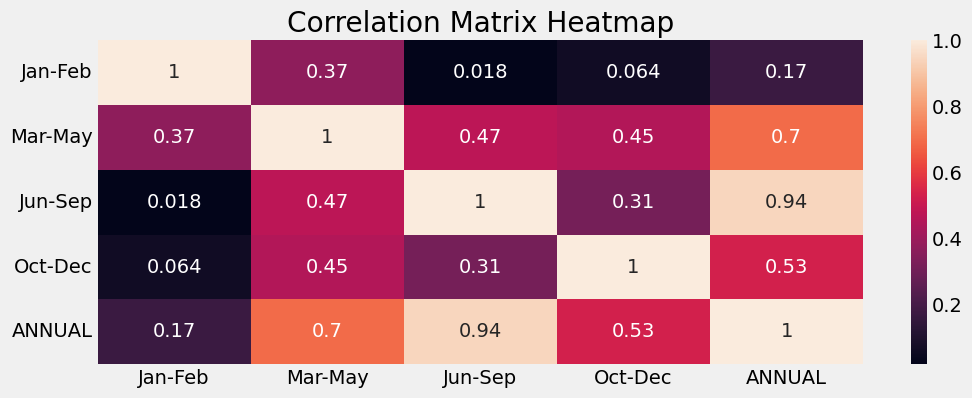

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
Input_Data = pd.read_csv("/content/rainfall in india 1901-2015.csv")

# Ensure that 'Input_Data' is a DataFrame with the desired columns ('Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL')

# Check if 'Input_Data' has missing values, as they can cause errors in correlation calculations.
# You can drop or fill missing values before calculating the correlation.
# For example, you can drop rows with missing values like this:
# Input_Data.dropna(inplace=True)

plt.figure(figsize=(11, 4))
# Check if the column names ('Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL') are correct and present in 'Input_Data'.
# Also, ensure that they are numeric columns, as the corr() method works on numeric data.
sns.heatmap(Input_Data[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL']].corr(), annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [71]:
 import numpy as np  # Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics

# Ensure your features and target are correctly loaded or defined here
# Replace the following lines with your actual data loading or defining code
features = np.random.rand(100, 10)  # Replace with your features
target = np.random.randint(0, 2, 100)  # Replace with your target variable

# Splitting the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, stratify=target, random_state=2)

# Balancing the training data using RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=22)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)

# Normalizing the features for stable and fast training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_val_scaled = scaler.transform(X_val)

# Define a list of models to train
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

# Train each model and print the ROC AUC scores
for model in models:
    model.fit(X_train_scaled, Y_resampled)
    train_preds = model.predict_proba(X_train_scaled)[:, 1]  # Probability of the positive class
    val_preds = model.predict_proba(X_val_scaled)[:, 1]      # Probability of the positive class

    print(f'Model: {model.__class__.__name__}')
    print('Training ROC AUC Score:', metrics.roc_auc_score(Y_resampled, train_preds))
    print('Validation ROC AUC Score:', metrics.roc_auc_score(Y_val, val_preds))
    print()


Model: LogisticRegression
Training ROC AUC Score: 0.6638905413444378
Validation ROC AUC Score: 0.27

Model: XGBClassifier
Training ROC AUC Score: 1.0
Validation ROC AUC Score: 0.49

Model: SVC
Training ROC AUC Score: 0.051457465794170154
Validation ROC AUC Score: 0.6200000000000001



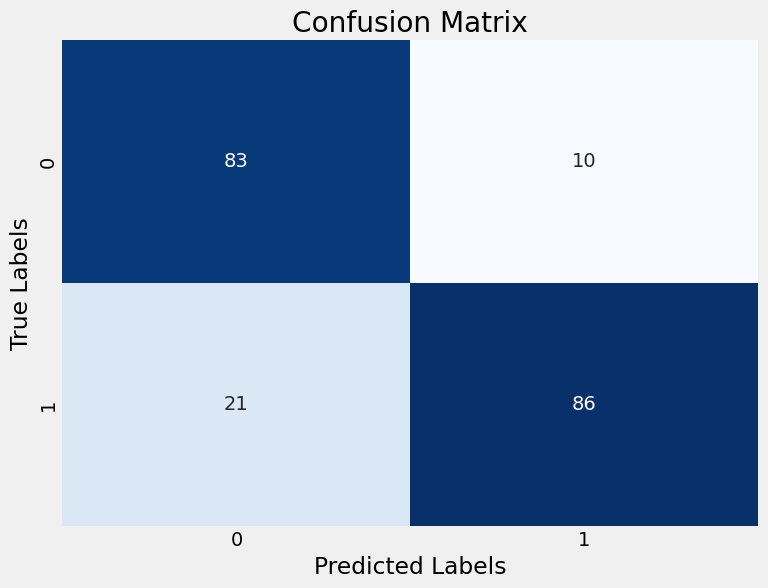

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate some example data for illustration purposes
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (SVM in this example)
clf = SVC()
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_val)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


<Figure size 1800x800 with 0 Axes>

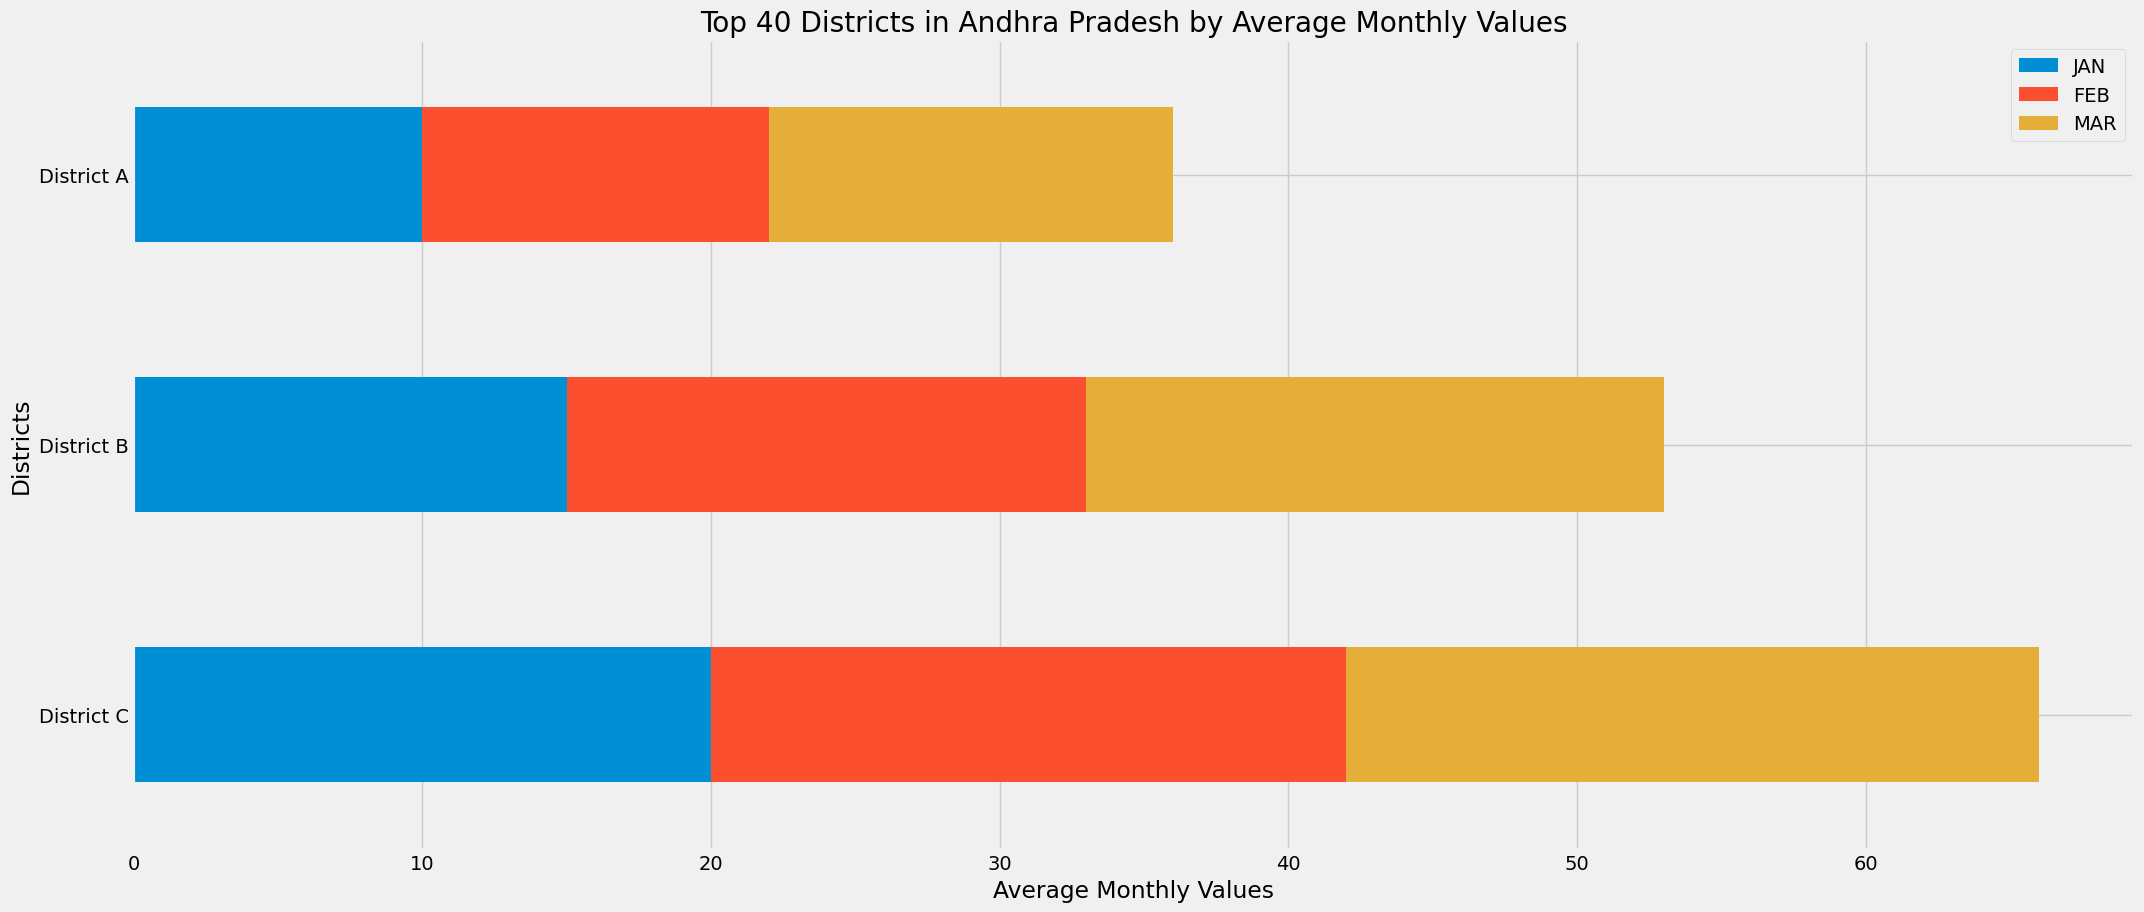

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (Replace this with your actual data loading)
data = {
    'STATE_UT_NAME': ['ANDHRA PRADESH', 'ANDHRA PRADESH', 'ANDHRA PRADESH'],
    'DISTRICT': ['District A', 'District B', 'District C'],
    'JAN': [10, 15, 20],
    'FEB': [12, 18, 22],
    'MAR': [14, 20, 24],
    # Add data for other months as well
}

# Create the DataFrame
district = pd.DataFrame(data)

# Filter the data for Andhra Pradesh
ap_data = district[district['STATE_UT_NAME'] == 'ANDHRA PRADESH']

# Calculate the mean values for each month for each district
ap_monthly_mean = ap_data[['DISTRICT', 'JAN', 'FEB', 'MAR']].groupby("DISTRICT").mean()

# Plot the horizontal bar chart for the first 40 districts
plt.figure(figsize=(18, 8))
ap_monthly_mean.head(40).plot(kind='barh', stacked=True)
plt.xlabel('Average Monthly Values')
plt.ylabel('Districts')
plt.title('Top 40 Districts in Andhra Pradesh by Average Monthly Values')
plt.gca().invert_yaxis()
plt.show()

